#### atlas定義

In [4]:
from nilearn import datasets, plotting, maskers
import numpy as np

atlas = datasets.fetch_atlas_aal(version='3v2')

atlas_filename = atlas.maps

coords = plotting.find_parcellation_cut_coords(atlas_filename)

print(f"Coordinates shape: {coords.shape}") # (166, 3)

[fetch_atlas_aal] Dataset found in /home/vscode/nilearn_data/aal_3v2

Coordinates shape: (166, 3)


## ABIDE AAL Connectome

#### 3D map

In [5]:
import os

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiLabelsMasker

In [6]:
# fetching a single subject's preprocessed functional data from the ABIDE dataset
dataset = datasets.fetch_abide_pcp(n_subjects=1, pipeline='cpac', band_pass_filtering=True)

# loading the AAL atlas for parcellation
atlas = datasets.fetch_atlas_aal()
labels = atlas.labels

# extracting time series from the functional data using the AAL atlas
masker = NiftiLabelsMasker(
    labels_img=atlas.maps, 
    standardize='zscore_sample', # type: ignore
    memory='nilearn_cache', 
    verbose=5
)
time_series = masker.fit_transform(dataset.func_preproc[0])

[fetch_abide_pcp] Dataset found in /home/vscode/nilearn_data/ABIDE_pcp

[fetch_atlas_aal] Dataset found in /home/vscode/nilearn_data/aal_3v2

[NiftiLabelsMasker.wrapped] Loading regions from .../AAL3/AAL3v1.nii

[NiftiLabelsMasker.wrapped] Resampling regions

/tmp/ipykernel_56688/2418049090.py:15: UserWarning: After resampling the label image to the data image, the following labels were removed: {np.uint8(160), np.uint8(134)}. Label image only contains 165 labels (including background).
  time_series = masker.fit_transform(dataset.func_preproc[0])


[NiftiLabelsMasker.wrapped] Finished fit

[Memory]1.2s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [8]:
correlation_measure = ConnectivityMeasure(
    kind='correlation', 
    standardize='zscore_sample'   # type: ignore
)
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [17]:
coords = plotting.find_parcellation_cut_coords(atlas.maps)
view = plotting.view_connectome(
    correlation_matrix, 
    coords[:correlation_matrix.shape[0]], 
    edge_threshold="98%"
)
view

#### 2D map

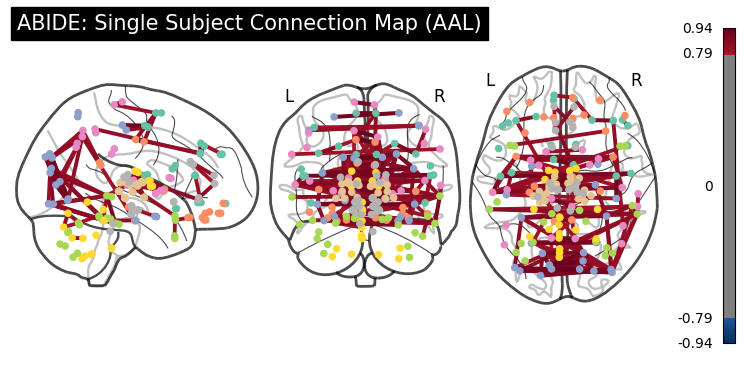

In [10]:
from nilearn import plotting

plotting.plot_connectome(
    correlation_matrix, 
    coords[:correlation_matrix.shape[0]], 
    edge_threshold="99%",
    display_mode='ortho',
    node_size=20,
    edge_cmap='RdBu_r',
    title="ABIDE: Single Subject Connection Map (AAL)"
)

plotting.show()

#### Heatmap

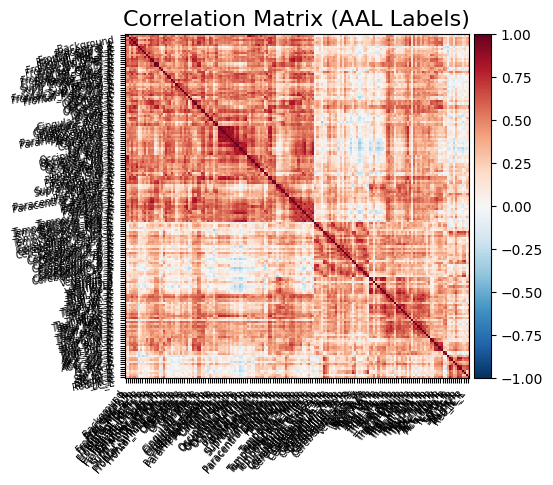

In [15]:
from nilearn import plotting

labels = atlas.labels[:correlation_matrix.shape[0]]

plotting.plot_matrix(
    correlation_matrix, 
    labels=labels, 
    colorbar=True, 
    vmax=1.0, 
    vmin=-1.0,
    title="Correlation Matrix (AAL Labels)"
)

#### Chord Diagram

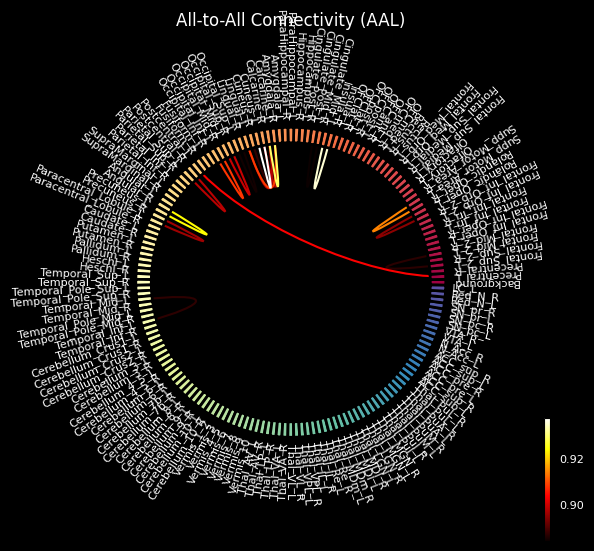

In [16]:
from mne_connectivity.viz import plot_connectivity_circle
import matplotlib.pyplot as plt

node_names = atlas.labels[:164]

fig, ax = plt.subplots(figsize=(8, 8), facecolor='black', subplot_kw=dict(polar=True))
plot_connectivity_circle(
    correlation_matrix, 
    node_names, 
    n_lines=20, 
    title='All-to-All Connectivity (AAL)',
    ax=ax
)
plt.show()